In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_O_50_base_test.nc") #i=103

In [3]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 500, yF: 1, xF: 500, yC: 1, time: 1021)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 2.0 6.0 10.0 14.0 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 36 days 00:48:38.367126032
Data variables: (12/14)
    KE       (time, zC, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    B        (time, zC, yC, xC) float64 ...
    GSP      (time, zC, yF, xC) float64 ...
    v        (time, zC, yF, xC) float64 ...
    ...       ...
    k        (time, zC, yC, xF) float64 ...
    E        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    AGSP     (time, zC, yC, xF) float64 ...
    u        (time, zC, yC, xF) float64 ...
    PV       (time, zF, yF, xF) float64 ...
Attributes:
    interval:              3141.592701438986
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 52.360 minutes.
    date:                  This file was generated on 2024-05-23T14:23:18.356.
    schedule:              TimeInterval

In [4]:
u = ocean_data.u#+ocean_data.U
v = ocean_data.v#+ocean_data.V
b = ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [ ]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[19]*(f/(2*np.pi))

In [ ]:
# ocean_data.E

In [ ]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -2
v[q].plot()
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
# plt.show()

In [ ]:
b[0,:,0,:].dims

In [ ]:
# plt.contour(b[0])
b[0,:,0,:].mean(dim='xC').plot()#.plot.contour()

In [4]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data.u.time)
def animate(t):
    plt.clf()
    ocean_data.u[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('u_base_PSI.gif') 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [5]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(w.time)
def animate(t):
    plt.clf()
    ocean_data.v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=240) 
anim.save('v_PSI_base.gif',fps=240) 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [6]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(w.time)
def animate(t):
    plt.clf()
    ocean_data.w[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=240) 
anim.save('w_PSI_base.gif',fps=240) 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [7]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.PV[t].plot(add_colorbar=True,vmin=-1e-9,vmax=1e-9,cmap='Accent') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('PV_PSI_base.gif') 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.KE[t].plot(add_colorbar=True,vmin=0,vmax=1e-7,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('u_base_test_case_downwelling_color_change.gif') 
# plt.close()

In [13]:
KE_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'KE' (time: 1021)>
array([9.94055902e-09, 3.66469688e-09, 2.37915397e-09, ...,
       1.54995954e-03, 2.24378440e-03, 1.52681484e-03])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 36 days 00:48:38.367126032

In [14]:
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [15]:
inertial_period[120]

<xarray.DataArray 'time' ()>
array(6.00000009)
Coordinates:
    time     timedelta64[ns] 4 days 08:43:11.124172678

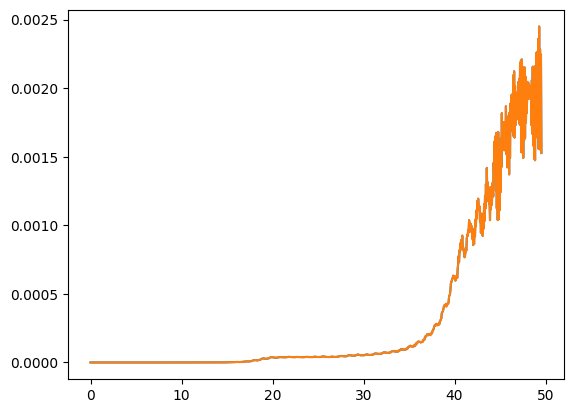

In [11]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values)
plt.show()

In [58]:
timeKE = KE_spatial_average_time_series.time
timeKE*1e-9

<xarray.DataArray 'time' (time: 2068)>
array([      0,     628,    1256, ..., 1254752, 1255380, 1256008],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 12:53:28.762035316

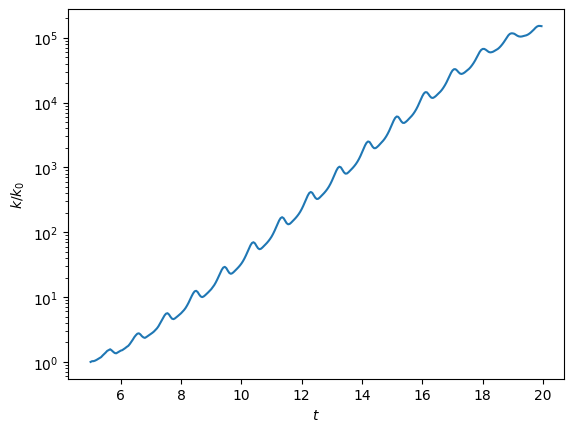

In [33]:
plt.plot(KE_spatial_average_time_series_ip.intp[100:410],KE_spatial_average_time_series_ip.values[100:410]/KE_spatial_average_time_series_ip.values[100])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
plt.yscale('log')
plt.show()

In [21]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 500, yF: 1, xF: 500, yC: 1, time: 1021)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 2.0 6.0 10.0 14.0 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 36 days 00:48:38.367126032
Data variables: (12/14)
    KE       (time, zC, yC, xC) float64 4.846e-10 2.416e-08 ... 0.002028 0.00196
    V        (time, zC, yF, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    B        (time, zC, yC, xC) float64 ...
    GSP      (time, zC, yF, xC) float64 ...
    v        (time, zC, yF, xC) float64 ...
    ...       ...
    k        (time, zC, yC, xF) float64 ...
    E        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    AGSP     (time, zC, yC, xF) float64 ...
    u        (time, zC, yC, xF) float64 ...
    PV       (time, zF, yF, xF) float64 ...
Attributes:
    interval:              3141.592701438986
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 52.360 minutes.
    date:                  This file was generated on 2024-05-23T14:23:18.356.
    schedule:              TimeInterval

In [27]:
AGSP_spatial_average_time_series = ocean_data.AGSP.mean(dim=['xF','yC','zC'])
inertial_period = AGSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


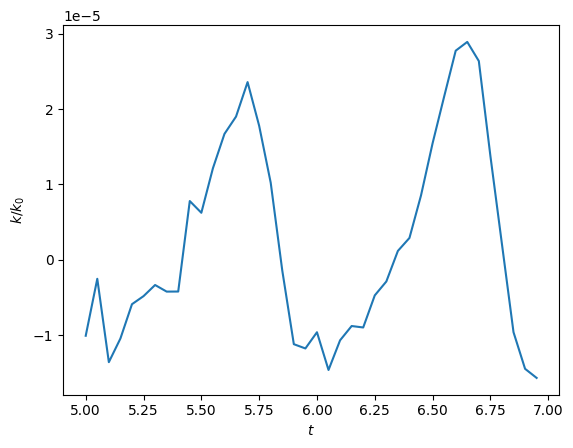

In [42]:
plt.plot(AGSP_spatial_average_time_series_ip.intp[100:140],AGSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [44]:
GSP_spatial_average_time_series = ocean_data.GSP.mean(dim=['xC','yF','zC'])
inertial_period = GSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


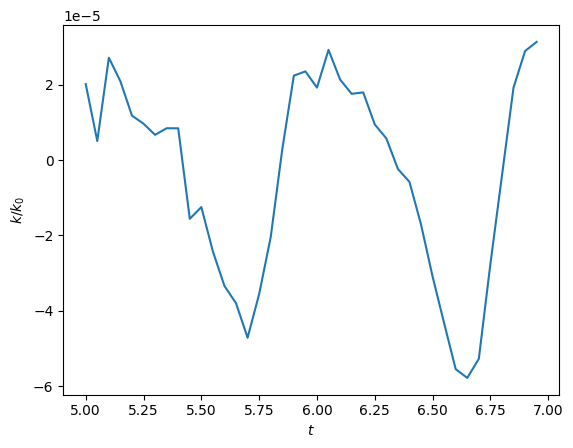

In [45]:
plt.plot(GSP_spatial_average_time_series_ip.intp[100:140],GSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [47]:
BFLUX_spatial_average_time_series = ocean_data.BFLUX.mean(dim=['xC','yC','zF'])
inertial_period = BFLUX_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


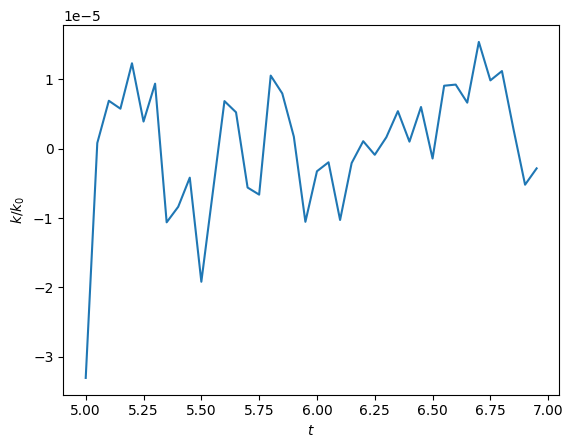

In [49]:
plt.plot(BFLUX_spatial_average_time_series_ip.intp[100:140],BFLUX_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [51]:
E_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])
inertial_period = E_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
E_spatial_average_time_series_ip = E_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


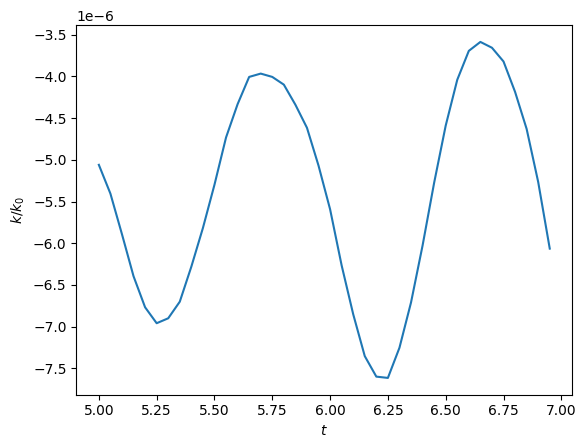

In [53]:
plt.plot(E_spatial_average_time_series_ip.intp[100:140],-1*E_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
ocean_data.time[10:-1:2]*10**(-4)/(2*np.pi)

In [ ]:
plt.plot(ocean_data.time[490:]*(1e-4)/(2*np.pi),ocean_data.u[490:,20,0,250]/ocean_data.v[490,20,0,250])
plt.plot(ocean_data.time[490:]*(1e-4)/(2*np.pi),10*ocean_data.U[490:,20,0,250]/ocean_data.V[490,20,0,250])
plt.ylabel("$u/v_1$,$10*U/V_1$")
plt.show()

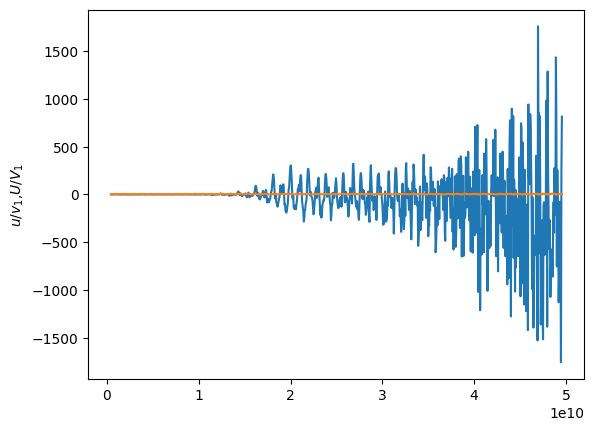

In [14]:
plt.plot(ocean_data.time[9:]*(1e-4)/(2*np.pi),ocean_data.v[9:,20,0,250]/ocean_data.v[9,20,0,250])
plt.plot(ocean_data.time[9:]*(1e-4)/(2*np.pi),ocean_data.V[9:,20,0,250]/ocean_data.V[9,20,0,250])
plt.ylabel("$u/v_1$,$U/V_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[10:]*(1e-4)/(2*np.pi),ocean_data.U[10:,20,0,250]/ocean_data.V[10,20,0,250])
plt.ylabel("$U/U_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[10:]*(1e-4)/(2*np.pi),ocean_data.V[10:,20,0,250]/ocean_data.V[10,20,0,250])
plt.ylabel("$V/V_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.U[10:,20,0,250],ocean_data.V[10:,20,0,250])
plt.gca().set_aspect("equal")
plt.show()

In [ ]:
time = ocean_data.time[10:]*1e-9
plt.plot(time*(1e-4)/(2*np.pi),ocean_data.v[10:,20,0,250]/ocean_data.v[10,20,0,250])
plt.ylabel("$v/v_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.u[10:,20,0,250],ocean_data.v[10:,20,0,250])
plt.xlabel("u")
plt.ylabel("v")
plt.show()

In [ ]:
KE_spatial_average_time_series.differentiate("time",datetime_unit='timedelta64[ns]')

In [ ]:
eps_spatial_average_time_series = ocean_data.ε.mean(dim=['xC','yC','zC'])

In [ ]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [ ]:
PV_spatial_average_time_series = ocean_data.PV.mean(dim=['xF','yF'])
PV_spatial_average_time_series

In [85]:
v.zC

<xarray.DataArray 'zC' (zC: 100)>
array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,
        25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,
        49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,
        73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,  89.,  91.,  93.,  95.,
        97.,  99., 101., 103., 105., 107., 109., 111., 113., 115., 117., 119.,
       121., 123., 125., 127., 129., 131., 133., 135., 137., 139., 141., 143.,
       145., 147., 149., 151., 153., 155., 157., 159., 161., 163., 165., 167.,
       169., 171., 173., 175., 177., 179., 181., 183., 185., 187., 189., 191.,
       193., 195., 197., 199.])
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
Attributes:
    units:      m
    long_name:  Locations of the cell centers in the z-direction.

In [ ]:
plt.plot(u.isel(xF=500,yC=0,zC=25),v.isel(xC=500,yF=0,zC=25))
plt.gca().set_aspect('equal')

In [7]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
v.sel(zC=slice(0,h))

<xarray.DataArray 'v' (time: 1021, zC: 55, yF: 1, xC: 500)>
[28077500 values with dtype=float64]
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 101.0 103.0 105.0 107.0 109.0
  * xC       (xC) float64 2.0 6.0 10.0 14.0 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 36 days 00:48:38.367126032
Attributes:
    units:      m/s
    long_name:  Velocity in the y-direction

In [54]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
u_sel = ocean_data.U.sel(zC=slice(0,h))
v_sel = ocean_data.V.sel(zC=slice(0,h))
w_sel = ocean_data.w.sel(zF=slice(0,h))
u_z_average = u_sel.mean(dim=['zC'])
v_z_average = v_sel.mean(dim=['zC'])
w_z_average = w_sel.mean(dim=['zF'])
# .isel(zC=np.arange(0,55))
u_diff = (u_sel-u_z_average).mean(dim=['xF','yC','zC'])
v_diff = (v_sel-v_z_average+dVdz*(h-v_sel.zC)-Vi).mean(dim=['xC','yF','zC'])
# v_diff = (v-v_z_average).mean(dim=['xC','yF','zC'])
w_diff = (w_sel-w_z_average).mean(dim=['xC','yC','zF'])

In [63]:
(v_sel-v_z_average+dVdz*(h-v_sel.zC)-Vi).mean(dim=['xC','yF','zC'])

<xarray.DataArray (time: 1021)>
array([-0.05, -0.05, -0.05, ..., -0.05, -0.05, -0.05])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 36 days 00:48:38.367126032

In [57]:
h

110.0

In [59]:
dVdz

0.0009090909090909091

In [50]:
K = 1/2 *(u_diff**2+v_diff**2+w_diff**2)
inertial_period = K.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
K_ip = K.assign_coords(intp = ('time',inertial_period.data))
K_ip

<xarray.DataArray (time: 1021)>
array([5.34078391e-37, 1.41864573e-37, 1.33519599e-37, ...,
       1.74086635e-36, 5.40689441e-37, 1.34227082e-36])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 36 days 00:48:38.367126032
    intp     (time) float64 0.0 0.05 0.1 0.15 0.2 ... 49.4 49.45 49.5 49.55

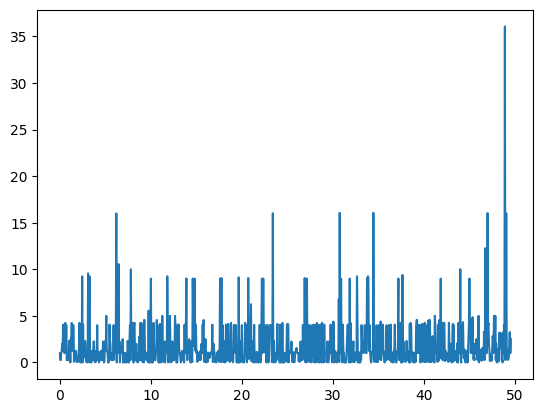

In [51]:
plt.plot(K_ip.intp,K_ip/K_ip[0])
# plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.intp/K_ip[0])
plt.show()

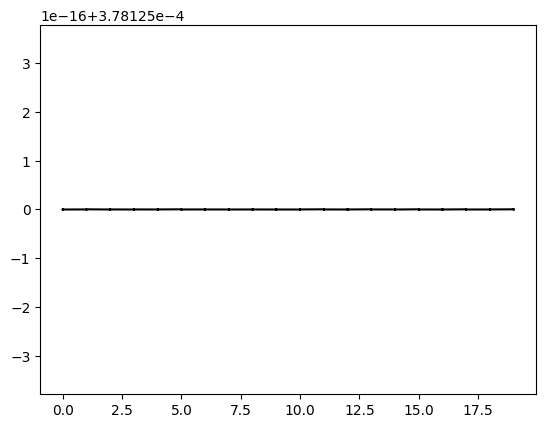

In [37]:

plt.plot(np.array(K.time)*(1e-13)/(2*np.pi),K,color="k")
# plt.plot(KE_spatial_average_time_series.time*(1e-4)/(2*np.pi),KE_spatial_average_time_series.values/K.values[0])
plt.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    PV_spatial_average_time_series[t].plot()
    plt.ylim([0,1e-9])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('spatially_averaged_PV_standard_case_zoomed_in.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling_color_change.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].mean('xF').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_u.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].mean('xC').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_v.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    b[t].mean('xC').plot()
    plt.ylim([-0.0001,0.0001])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_b.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 20)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    cf = v[t].plot(add_colorbar=True)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()